In [1]:
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
2,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
3,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
4,6411,94435,49219,1806.49,3,62,N,4,N,N,...,0,6,172624.0,339,0,N,5865,102,0,1622153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141335,6032,2510,54094,1.38,5,75,Y,2,NaN,NaN,...,0,30,231435.0,248,78297,N,5817,102,0,196080
1141336,1801,12832,137381,1138.04,5,75,Y,8,NaN,NaN,...,0,1,100009.0,201,198,N,1852,98,0,642025
1141337,6322,91008,15189,578.38,5,75,Y,8,NaN,NaN,...,0,4,191642.0,209,38222,N,5817,102,0,1478280
1141338,3226,145107,116252,435.32,5,75,Y,8,NaN,NaN,...,0,13,102338.0,192,90135,N,1458,102,0,661087


In [4]:
pfr = pdp.ProfileReport(df)
pfr.to_file('report.html')

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

/home/ykzheng/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 資料欄位
- acqic - 收單行代碼
- bacno - 歸戶帳號
- cano - 卡號
- conam - 交易金額(台幣)
- contp - 交易類別(e.g. 一般交易/刷退...)
- csmcu - 消費地幣別
- ecfg - 網路交易註記
- etymd - 交易型態(e.g. 實體交易/網路交易)
- flbmk - Fallback交易註記(預先授權)
- flg_3dsmk - 3DS交易驗證註記
- hecfg - 支付型態
- insfg - 分期交易註記
- iterm - 分期期數
- locdt - 授權日期
- loctm - 授權時間(HHMMSS)
- mcc - 特店類別
- mchno - 特店名稱
- ovrlt - 超額交易註記
- scity - 消費地城市
- stocn - 消費地國別
- stscd - 狀態碼
- txkey - 交易序號(唯一值)
- fraud_ind - 冒用交易註記(預測目標)

In [6]:
df = df.sort_values(['locdt', 'loctm'])

# 國外消費

In [20]:
df["oversea_flag"] = df.stocn != 102

In [35]:
oversea_pct = df.loc[:,['cano','oversea_flag']][df.fraud_ind!=-1].groupby('cano').mean()

In [36]:
oversea_pct

,oversea_flag
cano,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
213317,0.0
213321,0.0
213328,0.5


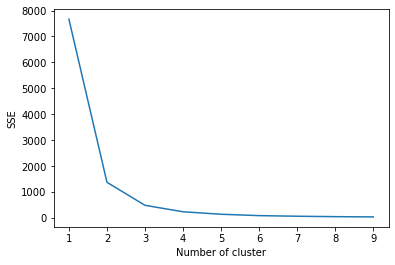

In [24]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(oversea_pct)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(oversea_pct)
oversea_pct["clusters"] = kmeans.labels_
oversea_pct.head(20)

,oversea_flag,clusters
cano,,
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
5,0.000000,0
7,0.000000,0
8,0.142857,0
9,0.000000,0


In [42]:
mcc_code = df.loc[:,['mcc', 'conam']].groupby(['mcc']).describe()
mcc_code.columns = mcc_code.columns.droplevel()
mcc_code.fillna(0, inplace=True)
mcc_code.head(5)

,count,mean,std,min,25%,50%,75%,max
mcc,,,,,,,,
0,7.0,1963.217143,385.580152,1558.27,1733.6900,1845.980,2104.4250,2662.04
1,1.0,1063.150000,0.000000,1063.15,1063.1500,1063.150,1063.1500,1063.15
2,74.0,1001.140541,352.866405,229.88,732.9900,1011.690,1216.6425,2168.49
3,106.0,558.346698,253.869965,140.93,368.4225,490.680,721.6150,1342.53
4,2.0,1146.655000,586.665283,731.82,939.2375,1146.655,1354.0725,1561.49


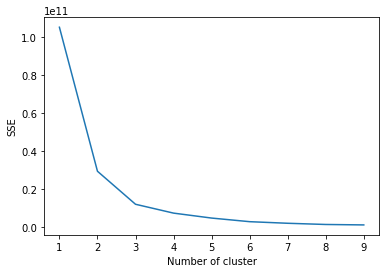

In [45]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mcc_code)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# 各卡MCC消費占比

In [49]:
# count mcc
mcc_txn_cnt = df.loc[:,['cano','mcc', 'conam']][df.fraud_ind!=-1].groupby(['cano','mcc']).count()
mcc_cnt = mcc_txn_cnt.groupby(['cano']).count()

In [55]:
mcc_txn_cnt

conam
cano   mcc       
0      228      1
       251      6
       255      1
       286      1
1      286      1
...           ...
213328 340      2
213329 408      1
213334 251      2
       263      1
       294      1

[549201 rows x 1 columns]

In [56]:
mcc_cnt

,conam
cano,
0,4
1,2
2,4
3,2
4,1
...,...
213317,1
213321,1
213328,1


In [61]:
mcc_pct = mcc_txn_cnt.groupby(['cano']).apply(lambda x:100 * x / float(x.sum()))

In [62]:
mcc_pct

conam
cano   mcc            
0      228   11.111111
       251   66.666667
       255   11.111111
       286   11.111111
1      286   33.333333
...                ...
213328 340  100.000000
213329 408  100.000000
213334 251   50.000000
       263   25.000000
       294   25.000000

[549201 rows x 1 columns]

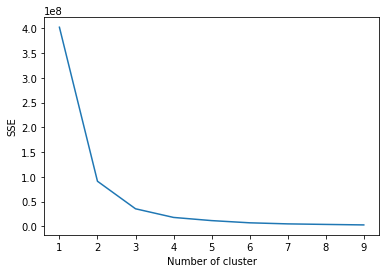

In [63]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mcc_pct)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [64]:
##k = 3 
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(mcc_pct)
mcc_pct["clusters"] = kmeans.labels_
mcc_pct

conam  clusters
cano   mcc                      
0      228   11.111111         1
       251   66.666667         2
       255   11.111111         1
       286   11.111111         1
1      286   33.333333         0
...                ...       ...
213328 340  100.000000         2
213329 408  100.000000         2
213334 251   50.000000         0
       263   25.000000         0
       294   25.000000         0

[549201 rows x 2 columns]

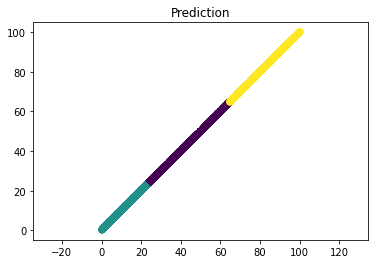

In [65]:
#results visualization
plt.figure()
plt.scatter(mcc_pct['conam'], mcc_pct['conam'], c = mcc_pct['clusters'])
plt.axis('equal')
plt.title('Prediction')
plt.show()

In [74]:
mcc_pct_sum = mcc_pct.groupby(['cano','clusters']).sum()
mcc_pct_sum

conam
cano   clusters            
0      1          33.333333
       2          66.666667
1      0          33.333333
       2          66.666667
2      1          14.705882
...                     ...
213317 2         100.000000
213321 2         100.000000
213328 2         100.000000
213329 2         100.000000
213334 0         100.000000

[198498 rows x 1 columns]

In [78]:
mcc_pct_sum['rank'] = mcc_pct_sum.groupby(['cano']).rank(ascending=False, method='max')
mcc_pct_sum.head(50)

conam  rank
cano clusters                  
0    1          33.333333   2.0
     2          66.666667   1.0
1    0          33.333333   2.0
     2          66.666667   1.0
2    1          14.705882   2.0
     2          85.294118   1.0
3    0          33.333333   2.0
     2          66.666667   1.0
4    2         100.000000   1.0
5    0          32.000000   2.0
     1          68.000000   1.0
7    1         100.000000   1.0
8    0          28.571429   2.0
     1          71.428571   1.0
9    1          16.666667   2.0
     2          83.333333   1.0
10   0          40.000000   2.0
     1          60.000000   1.0
11   0         100.000000   1.0
14   0          33.333333   2.0
     2          66.666667   1.0
17   1         100.000000   1.0
19   2         100.000000   1.0
20   0          40.000000   2.0
     1          60.000000   1.0
21   2         100.000000   1.0
22   0          30.769231   2.0
     1          69.230769   1.0
23   0         100.000000   1.0
24   2         100.000000   1.0
25   2         100.000000   1.0
27   0          57.142857   1.0
     1          42.857143   2.0
28   0          35.294118   2.0
     1          64.705882   1.0
29   1         100.000000   1.0
30   0         100.000000   1.0
31   0          35.714286   2.0
     1          64.285714   1.0
32   2         100.000000   1.0
34   0         100.000000   1.0
38   2         100.000000   1.0
39   0          28.571429   2.0
     1          71.428571   1.0
41   0          80.000000   1.0
     1          20.000000   2.0
43   2         100.000000   1.0
44   1         100.000000   1.0
45   2         100.000000   1.0
47   1         100.000000   1.0

In [73]:
mcc_pct_sum[mcc_pct_sum['rank']==1].head(20)

,,conam,rank
cano,clusters,,
0,2,66.666667,1.0
1,2,66.666667,1.0
2,2,85.294118,1.0
3,2,66.666667,1.0
4,2,100.000000,1.0
5,1,68.000000,1.0
7,1,100.000000,1.0
8,1,71.428571,1.0
9,2,83.333333,1.0
